📚Importing libraries

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
import nltk
nltk.download('punkt')
import nltk
nltk.download('wordnet')
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/gitpod/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /home/gitpod/nltk_data...
[nltk_data] Downloading package stopwords to /home/gitpod/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

✨Data Ingestion

In [4]:
total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/naive-bayes-project-tutorial/main/playstore_reviews.csv")
total_data.head()

,package_name,review,polarity
0,com.facebook.katana,privacy at least put some option appear offli...,0
1,com.facebook.katana,"messenger issues ever since the last update, ...",0
2,com.facebook.katana,profile any time my wife or anybody has more ...,0
3,com.facebook.katana,the new features suck for those of us who don...,0
4,com.facebook.katana,forced reload on uploading pic on replying co...,0


✨Preprocessing: Tokenization, removal of stop words and special characters, text normalization, and vectorization

In [5]:
total_data.columns

Index(['package_name', 'review', 'polarity'], dtype='object')

👩‍💻Step 1: Tokenization and Stop Words Removal
Tokenization: Divide the text into smaller units, such as words or phrases (tokens).

In [6]:
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)
    # Stop Words Removal
    tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_words]
    return ' '.join(tokens)

total_data['processed_text'] = total_data['review'].apply(preprocess_text)
#Show first 10 processed rows
print(total_data[['review', 'polarity', 'processed_text']].head())

                                              review  polarity  \
0   privacy at least put some option appear offli...         0   
1   messenger issues ever since the last update, ...         0   
2   profile any time my wife or anybody has more ...         0   
3   the new features suck for those of us who don...         0   
4   forced reload on uploading pic on replying co...         0   

                                      processed_text  
0  privacy least put option appear offline mean p...  
1  messenger issues ever since last update initia...  
2  profile time wife anybody one post view would ...  
3  new features suck us working back button guys ...  
4  forced reload uploading pic replying comment l...  


👩‍💻Step 2: Lemmatization (Optional)
Lemmatization: Reduces words to their base forms (lemmas). For example, it converts "running" to "run." Helps reduce the dimensions of the feature space by grouping related words.

In [7]:
lemmatizer = WordNetLemmatizer()
total_data['processed_text'] = total_data['processed_text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

👩‍💻Step 3: Removal of Special Characters and Punctuation
Removal of Special Characters and Punctuation: Removes punctuation marks and special characters that generally do not contribute information to the task.

In [8]:
total_data['processed_text'] = total_data['processed_text'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

👩‍💻Step 4: Text Normalization (Convert to lowercase)

Text Normalization: Converts all text to lowercase. Helps treat uppercase and lowercase words as identical, reducing complexity.

In [9]:
total_data['processed_text'] = total_data['processed_text'].apply(lambda x: x.lower())

👩‍💻Step 5: Text Vectorization (Using TF-IDF)

Text Vectorization (TF-IDF): Converts text into a numerical representation. TF-IDF assigns scores to words based on their frequency in a document and their inverse frequency in the corpus. This captures the relative importance of words in the document and the corpus

In [10]:
vectorizer = TfidfVectorizer(max_features=5000)  # Ajusta el número máximo de características según sea necesario
X = vectorizer.fit_transform(total_data['processed_text'])

👩‍💻Step 6: Removal of Rare or Very Frequent Words (Optional)

Removal of Rare or Very Frequent Words: May be optional, but helps eliminate words that are very rare or very common in the corpus. Extremely rare words may not provide useful information, while extremely common words may not be discriminative

In [11]:
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=5000)
X = vectorizer.fit_transform(total_data['processed_text'])

Divide intro train and test set

In [12]:
X = total_data["review"]
y = total_data["polarity"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.head()

331      just did the latest update on viber and yet ...
733     keeps crashing it only works well in extreme ...
382     the fail boat has arrived the 6.0 version is ...
704     superfast, just as i remember it ! opera mini...
813     installed and immediately deleted this crap i...
Name: review, dtype: object

Save train and test data on disk.

In [13]:
X_train.to_csv('X_train.csv', index=False, header=True)
X_test.to_csv('X_test.csv', index=False, header=True)
y_train.to_csv('y_train.csv', index=False, header=True)
y_test.to_csv('y_test.csv', index=False, header=True)

Transform the test into a matrix

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
vec_model = CountVectorizer(stop_words = "english")
X_train = vec_model.fit_transform(X_train).toarray()
X_test = vec_model.transform(X_test).toarray()

X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

Naive Bayes 👉 MultinomialNB

In [15]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [16]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0])

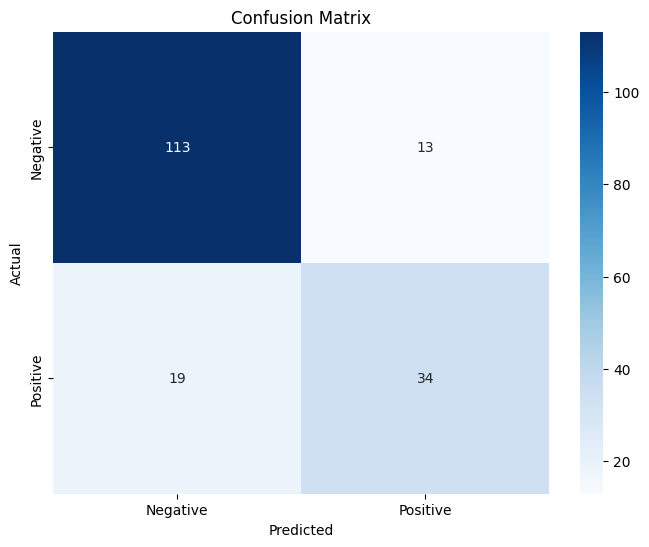

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_mat = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


✅Verdaderos Positivos (True Positives - TP):

Son 113 casos en los que el modelo predijo correctamente la clase positiva.

⛔Falsos Positivos (False Positives - FP):

Hay 13 casos en los que el modelo predijo incorrectamente la clase positiva. Estos son errores de tipo I.

⛔Falsos Negativos (False Negatives - FN):

Hay 19 casos en los que el modelo predijo incorrectamente la clase negativa. Estos son errores de tipo II.

✅Verdaderos Negativos (True Negatives - TN):

Son 34 casos en los que el modelo predijo correctamente la clase negativa.

In [17]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8156424581005587

Save model

In [18]:
# Save the model to disk
import pickle
with open('multinomial_nb_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

Accuracy counter

In [19]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB

for model_aux in [GaussianNB(), BernoulliNB()]:
    model_aux.fit(X_train, y_train)
    y_pred_aux = model_aux.predict(X_test)
    print(f"{model_aux} with accuracy: {accuracy_score(y_test, y_pred_aux)}")

GaussianNB() with accuracy: 0.8044692737430168
BernoulliNB() with accuracy: 0.770949720670391


So, the best model should be: MultinomialNB reaching 👉 0.81564245810055 of accuracy.

Hyperparams Tunning

In [20]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

hyperparams = {
    "alpha": np.linspace(0.01, 10.0, 200),
    "fit_prior": [True, False],
    #"class_prior": [None, [0.3, 0.7]],  # Vlues
}

random_search = RandomizedSearchCV(model, hyperparams, n_iter = 50, scoring = "accuracy", cv = 5, random_state = 42)
random_search

RandomizedSearchCV(cv=5, estimator=MultinomialNB(), n_iter=50,
                   param_distributions={'alpha': array([ 0.01      ,  0.06020101,  0.11040201,  0.16060302,  0.21080402,
        0.26100503,  0.31120603,  0.36140704,  0.41160804,  0.46180905,
        0.51201005,  0.56221106,  0.61241206,  0.66261307,  0.71281407,
        0.76301508,  0.81321608,  0.86341709,  0.91361809,  0.9638191 ,
        1.0140201 ,  1.06422111,  1.11442211,  1.1646231...
        8.54417085,  8.59437186,  8.64457286,  8.69477387,  8.74497487,
        8.79517588,  8.84537688,  8.89557789,  8.94577889,  8.9959799 ,
        9.0461809 ,  9.09638191,  9.14658291,  9.19678392,  9.24698492,
        9.29718593,  9.34738693,  9.39758794,  9.44778894,  9.49798995,
        9.54819095,  9.59839196,  9.64859296,  9.69879397,  9.74899497,
        9.79919598,  9.84939698,  9.89959799,  9.94979899, 10.        ]),
                                        'fit_prior': [True, False]},
                   random_state=42, scoring='accuracy')

Printing best Hyperparameters

In [21]:
random_search.fit(X_train, y_train)

print(f"Best hyperparameters: {random_search.best_params_}")

Best hyperparameters: {'fit_prior': False, 'alpha': 1.917638190954774}


Accuracy testing

In [22]:
model = MultinomialNB(alpha = 1.917638190954774, fit_prior = False)
model.fit(X_train, y_train)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.8212290502793296

Now the model is performing something better than the one above: 
Without hyperparams tunning 👉0.81564245810055
With hyperparams tunning 👉 0.8212290502793296

Save optimized model

In [24]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy del modelo: {accuracy}')

with open('multinomial_nb_model_with_tunning_fit_prior_False_alpha_1.917638190954774.pkl', 'wb') as model_info_file:
    pickle.dump({'model': model, 'accuracy': accuracy}, model_info_file)

Accuracy del modelo: 0.8212290502793296
